In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u

In [12]:
# image path for BHR71 Spitzer
irac1 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC1_mosaic.fits'
irac2 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC2_mosaic.fits'
irac3 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC3_mosaic.fits'
irac4 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC4_mosaic.fits'

In [189]:
hdulist = fits.open(irac1)
w = WCS(hdulist[0].header)
im_data = hdulist[0].data
ra = np.empty_like(im_data.T)
dec = np.empty_like(im_data.T)
theta_rot = np.radians(float(hdulist[0].header['CROTA2']))
CRPIX1, CRPIX2 = hdulist[0].header['CRPIX1'], hdulist[0].header['CRPIX2']
CRVAL1, CRVAL2 = hdulist[0].header['CRVAL1'], hdulist[0].header['CRVAL2']
CDELT1, CDELT2 = hdulist[0].header['CDELT1'], hdulist[0].header['CDELT2']
CROTA2 = hdulist[0].header['CROTA2']
ra_cen, dec_cen = w.all_pix2world(ref_pix[0],ref_pix[1],1)
for i in range(len(im_data[:,0])):
    for j in range(len(im_data[0,:])):
#         ra[i,j] = CDELT1*(i-CRPIX1)*np.cos(np.radians(CROTA2))-CDELT2*(j-CRPIX2)*np.sin(np.radians(CROTA2))+CRVAL1
#         dec[i,j] = CDELT1*(i-CRPIX1)*np.sin(np.radians(CROTA2))+CDELT2*(j-CRPIX2)*np.cos(np.radians(CROTA2))+CRVAL2
        ra[j,i], dec[j,i] = w.all_pix2world(j,i,1)
#         coord = np.matrix([ra[i,j]-ra_cen, dec[i,j]-dec_cen])*np.matrix([[np.cos(theta_rot),-np.sin(theta_rot)],[np.sin(theta_rot),np.cos(theta_rot)]])
#         ra[i,j]  = coord[0,0] + ra_cen
#         dec[i,j] = coord[0,1] + dec_cen

In [188]:
print w.wcs.print_contents()
print w.all_pix2world(CRPIX1, CRPIX2, 1)
print w.all_world2pix(c.ra.degree, c.dec.degree, 1)
print CRVAL1, CRVAL2
print ra[366,641], dec[614,366]
print np.max(ra)

None
[array(180.413103), array(-65.20030400000002)]
[array(641.2825618227826), array(366.37396673113)]
180.413103 -65.200304
180.403 -65.2352
180.735


In [141]:
w.to_header_string()

"WCSAXES =                    2 / Number of coordinate axes                      CRPIX1  =                484.0 / Pixel coordinate of reference point            CRPIX2  =                369.0 / Pixel coordinate of reference point            PC1_1   =      0.0598321785388 / Coordinate transformation matrix element       PC1_2   =      -0.998161450568 / Coordinate transformation matrix element       PC2_1   =       0.998255452406 / Coordinate transformation matrix element       PC2_2   =      0.0598321785388 / Coordinate transformation matrix element       CDELT1  =         -0.000339817 / [deg] Coordinate increment at reference point  CDELT2  =          0.000339801 / [deg] Coordinate increment at reference point  CUNIT1  = 'deg'                / Units of coordinate increment and value        CUNIT2  = 'deg'                / Units of coordinate increment and value        CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           CTYPE2  = 'DEC--TAN'           / Declin

In [164]:
c = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
ra_off = (ra-c.ra.degree)*3600.; dec_off = (dec-c.dec.degree)*3600.
print c.ra.degree, c.dec.degree
print c.ra.degree-50/3600., c.ra.degree+50/3600.
print np.shape(ra), np.shape(dec), np.shape(im_data)

180.403375 -65.1470055556
180.389486111 180.417263889
(737, 967) (737, 967) (737, 967)


(-234579.22000000003, -234479.22000000003)

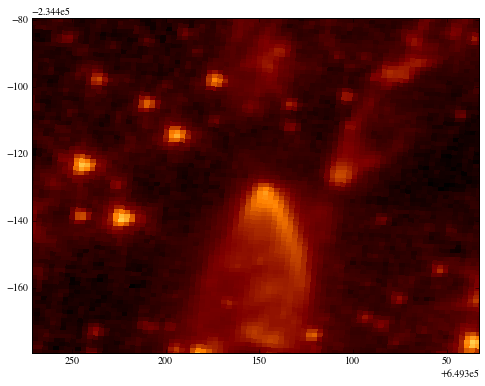

In [223]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.pcolormesh(ra*3600., dec*3600., im_data.T, cmap='afmhot',norm=LogNorm(vmin=1e-1,vmax=np.nanmax(im_data)))
# ax.set_aspect('equal')
# ax.set_xlim([180.3,180.5])
ax.set_xlim([c.ra.arcsec+50/np.cos(np.radians(c.dec.degree)),c.ra.arcsec-50/np.cos(np.radians(c.dec.degree))])
ax.set_ylim([c.dec.arcsec-50,c.dec.arcsec+50])